# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

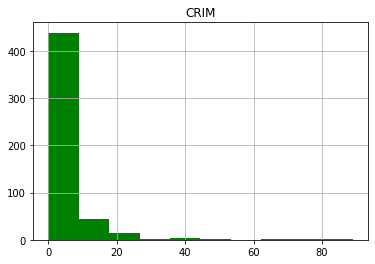

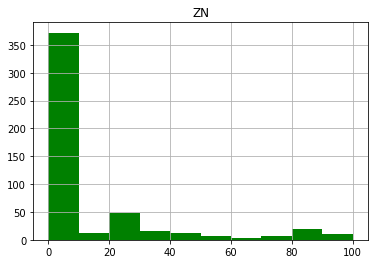

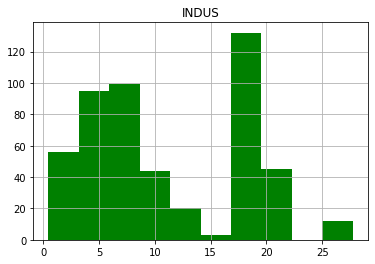

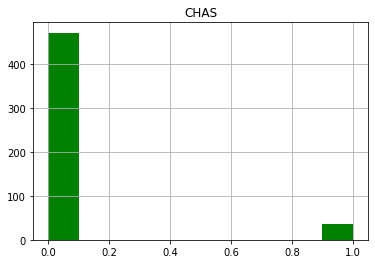

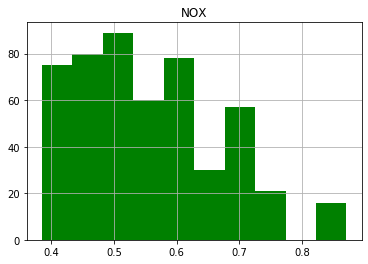

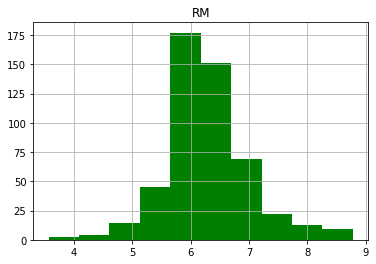

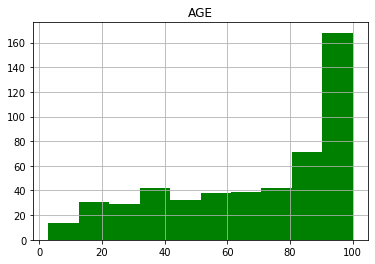

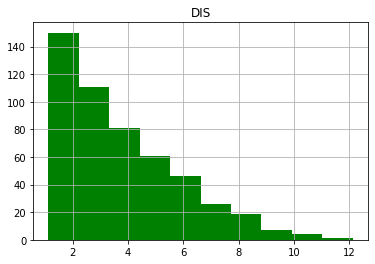

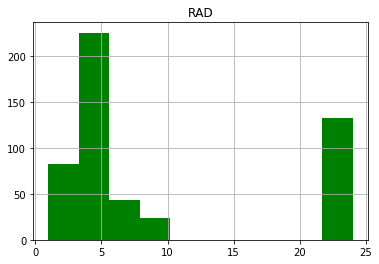

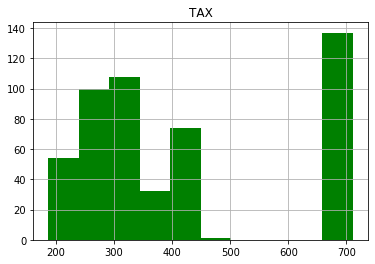

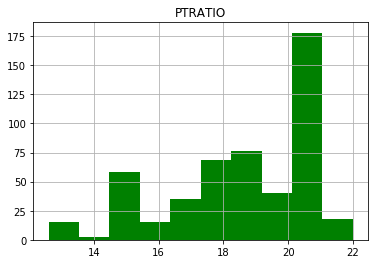

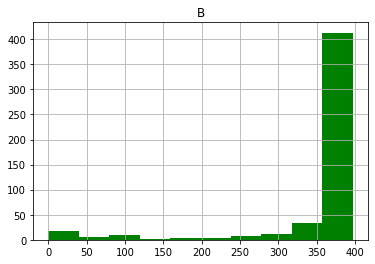

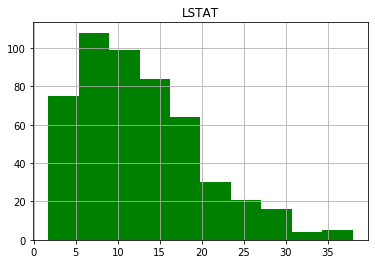

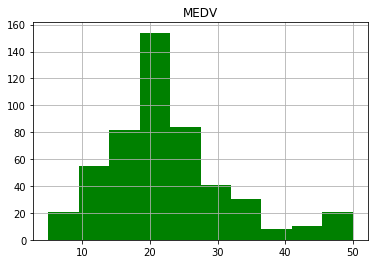

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

for name in names:
    n, bins, patches = plt.hist(data[name], 10, facecolor='g')
    plt.title(name)
    plt.grid(True)
    plt.show()

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное  -  RM
2.   Равномерное  - Не увидел
3.   Биноминальное  - CHAS
4.   Бернулли  - CHAS
5.   Геометрическое  - DIS
6.   Логнормальное  - LSTAT, MEDV



C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


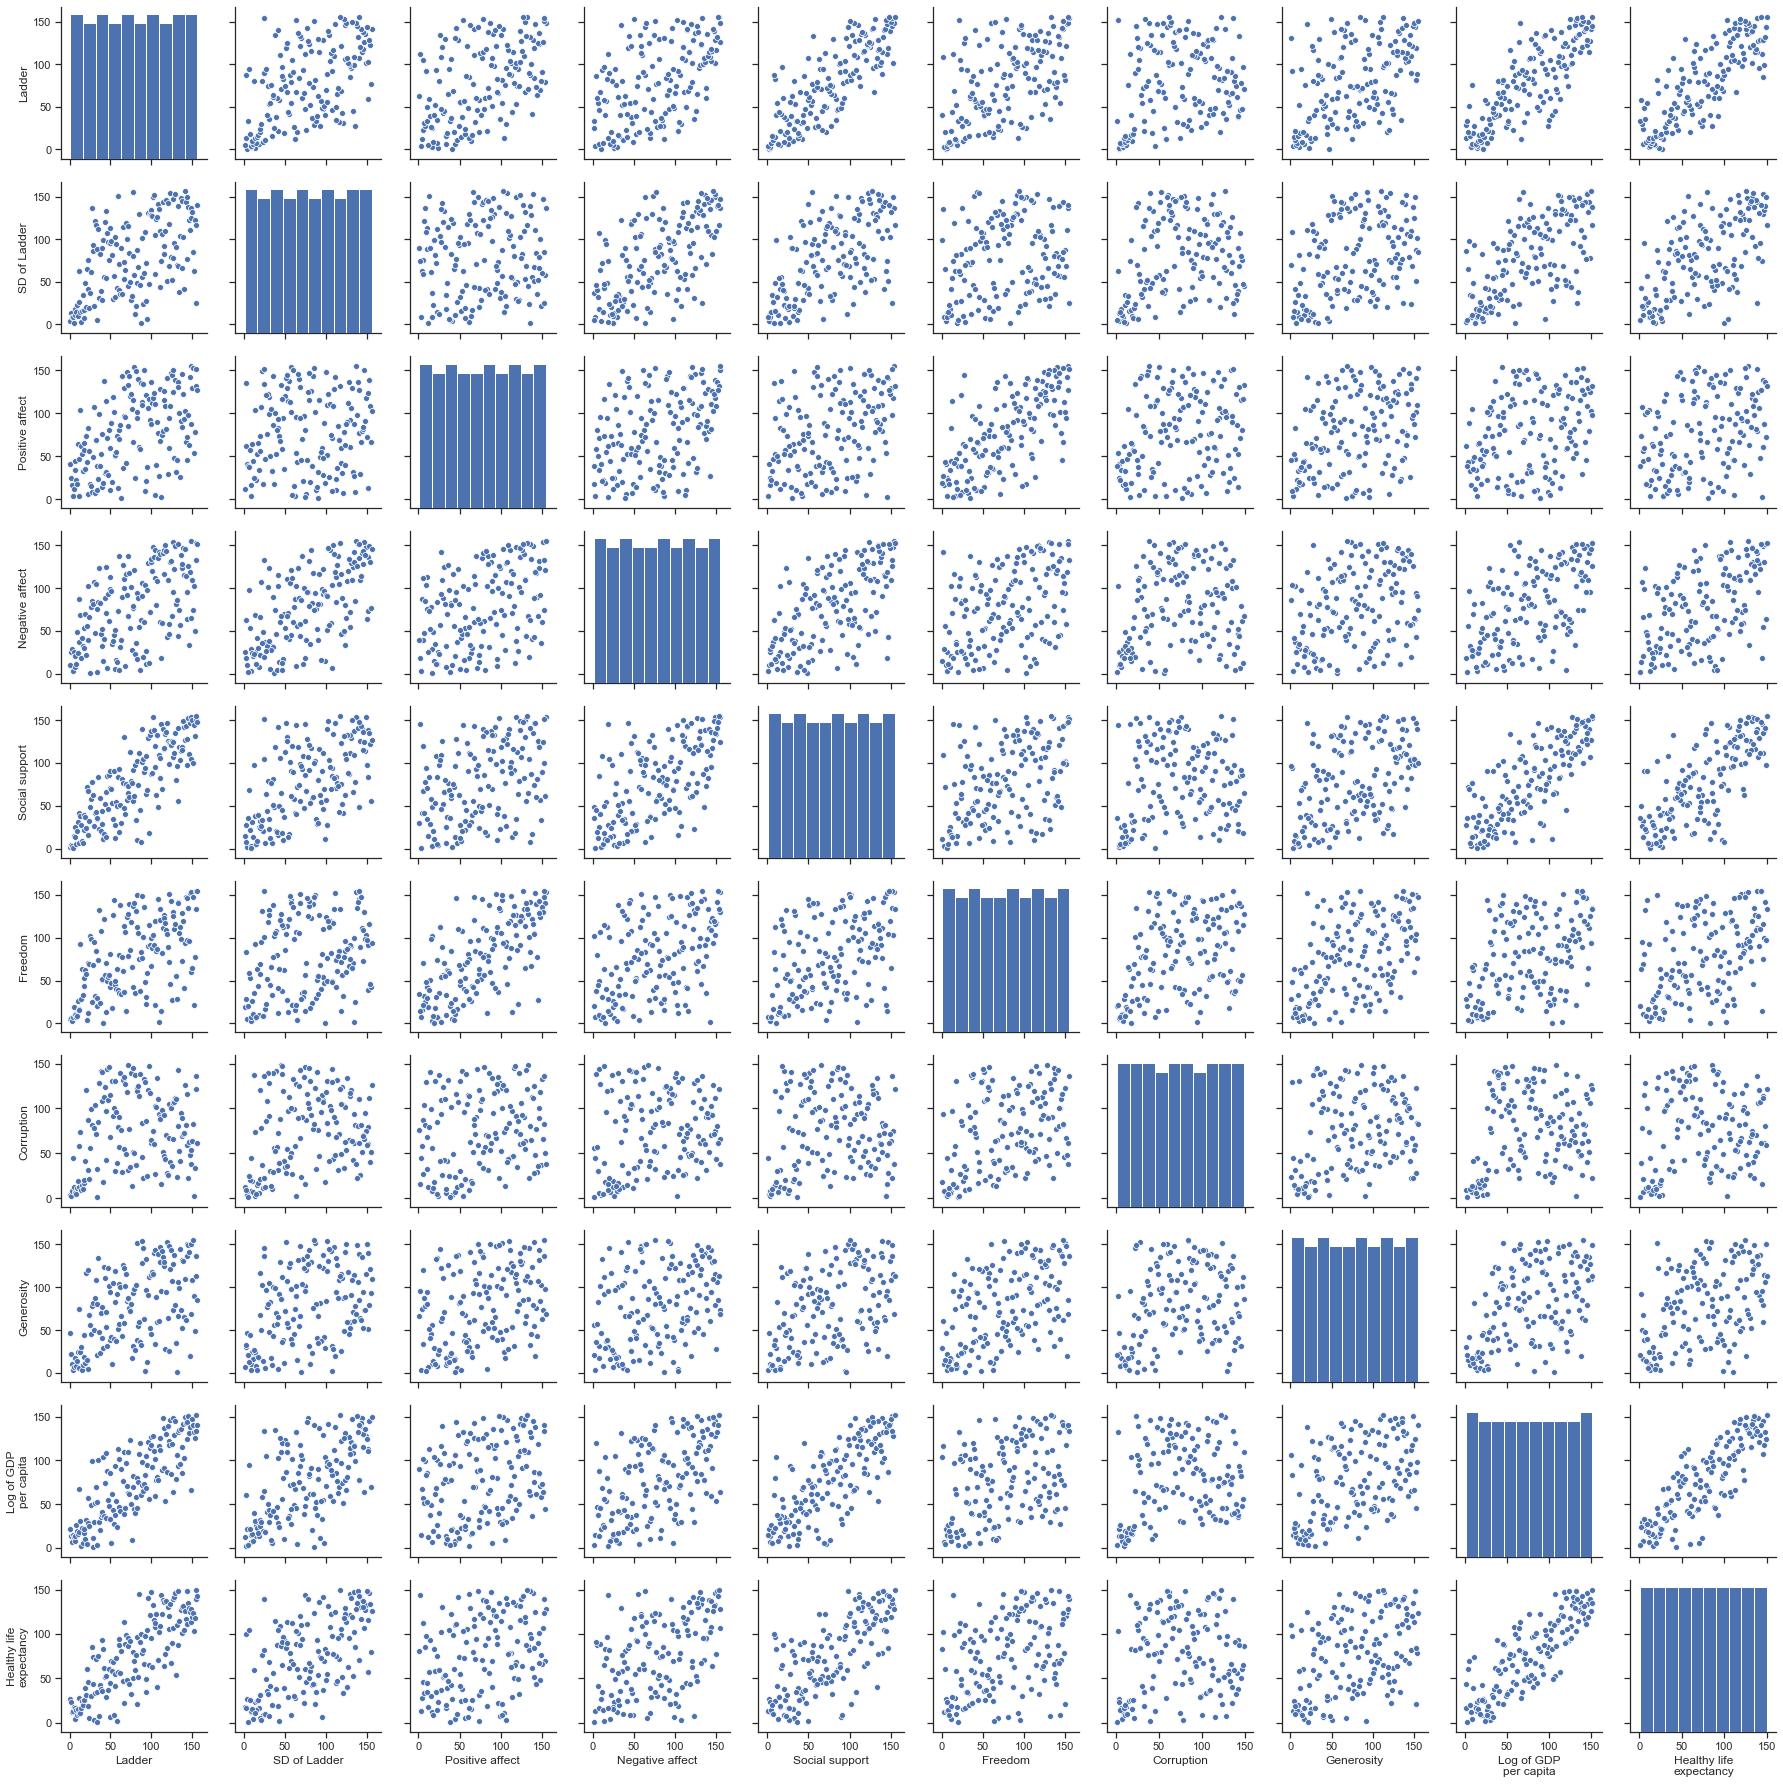

In [3]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [14]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [15]:
dataForCov = data.drop(["Country (region)", "Ladder"], axis = 1)
np.cov(dataForCov)

array([[ 293.5       ,  109.875     ,   35.        , ...,  188.375     ,
         -63.5       , -145.875     ],
       [ 109.875     ,   83.25      ,   57.125     , ...,    3.75      ,
          13.75      ,   48.5       ],
       [  35.        ,   57.125     ,   63.94444444, ...,   10.52777778,
          25.95833333,   23.81944444],
       ...,
       [ 188.375     ,    3.75      ,   10.52777778, ..., 1594.86111111,
         278.70833333,  -82.72222222],
       [ -63.5       ,   13.75      ,   25.95833333, ...,  278.70833333,
         276.5       ,  351.95833333],
       [-145.875     ,   48.5       ,   23.81944444, ...,  -82.72222222,
         351.95833333, 1062.94444444]])

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [16]:
data.isnull().sum()
data.fillna(0, inplace=True)
data.head(100)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [17]:
len(data["Country (region)"])

156

In [18]:
len(data["Country (region)"].unique())

156

Это не проблема классификации, т.к. каждая запись представляет уникальную страну и нет никакого разбиения по группам. Если были бы указаны группы (страны 1,2,3 миров), то в таком случае была бы проблема классификации.

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

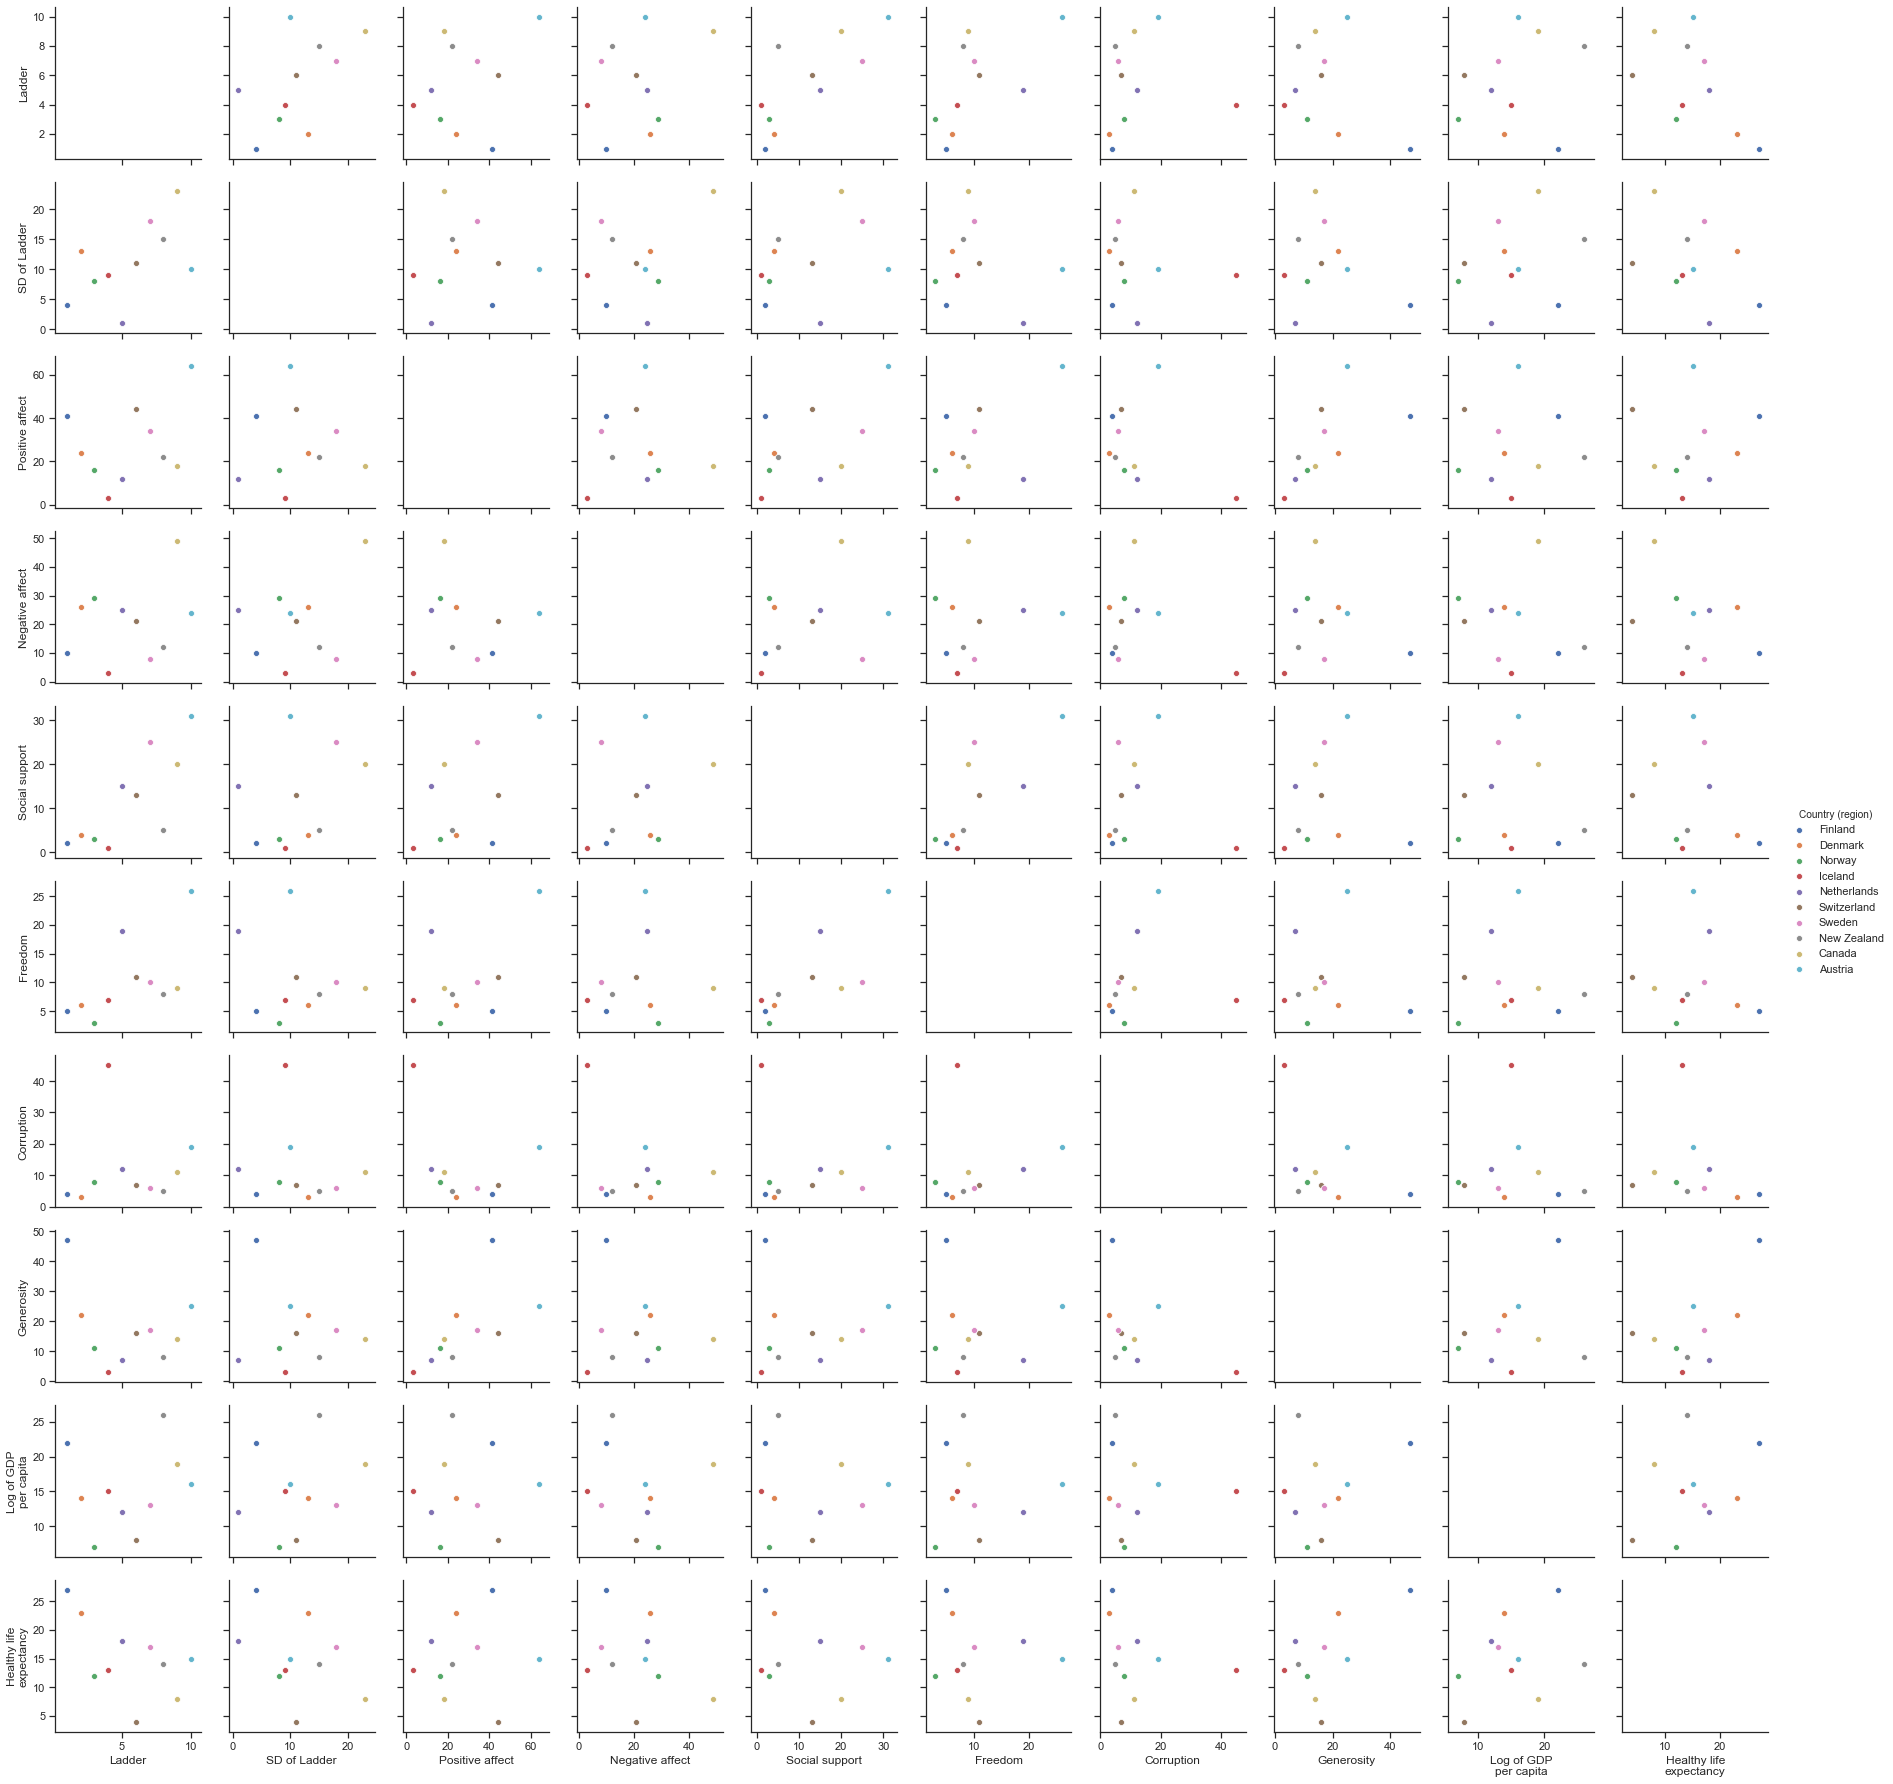

In [22]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
fig = sns.pairplot(data=data.head(10), hue='Country (region)') #отрисовал график для нескольких стран, т.к. для всех данных графики не загружаются
plt.show()

На этих график более схожи Финляндия и Швеция, но по некоторым параметрам между ними имеются различия

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

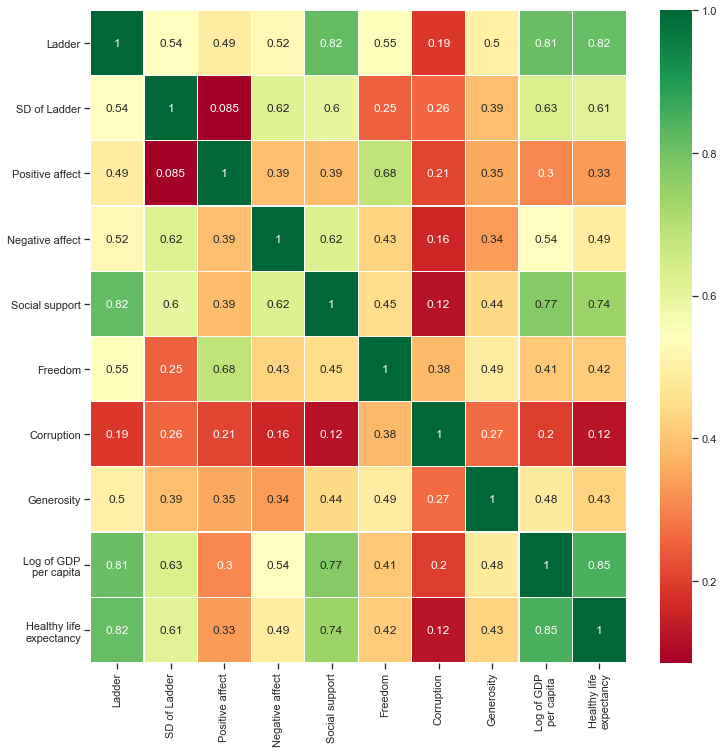

In [63]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Вывод - удовлетворение жизнью по большей части зависит от социальной поддержки и здравоохранения

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


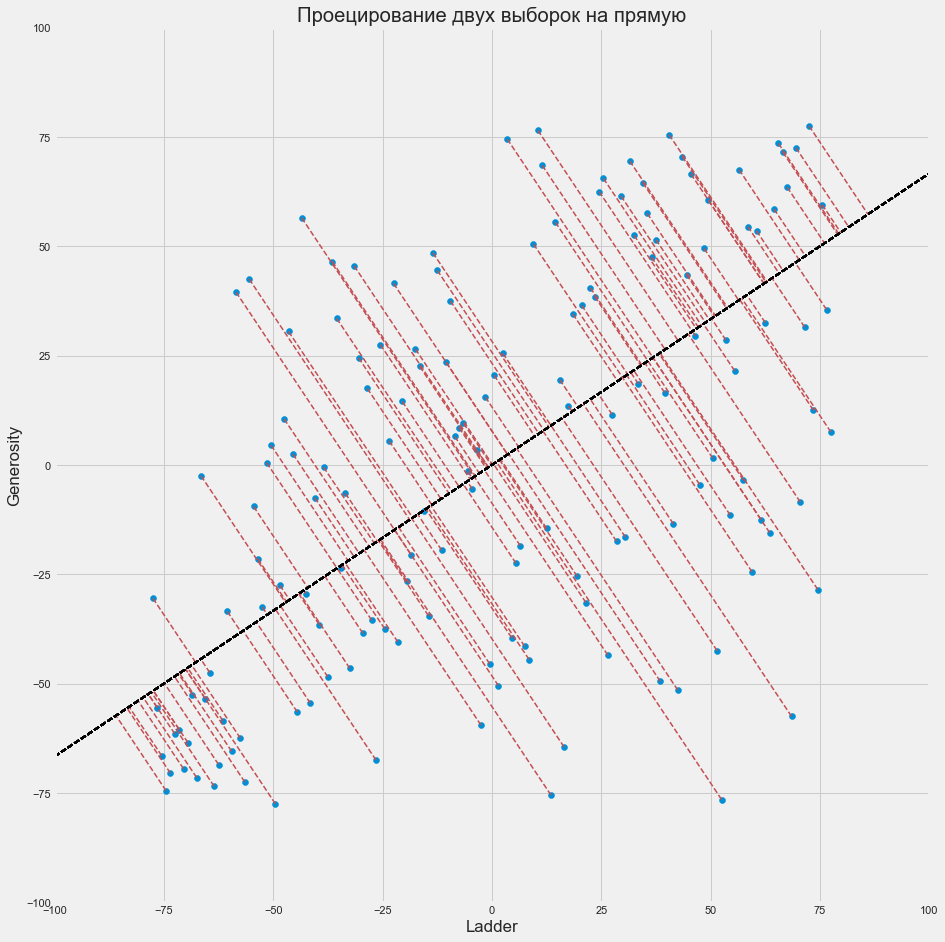

In [84]:
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler


A = np.array(data.as_matrix(columns=["Ladder", "Generosity"]))
# Нормализуем данные
A = StandardScaler(with_std=False,copy=False).fit_transform(A)

fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111)
ax0.set_aspect('equal')
ax0.set_xlim((-100,100))
ax0.set_ylim((-100,100))

ax0.scatter(A[:,0],A[:,1])


for i in range(len(A[:,0])):

    v = np.array([3,2])
    ax0.plot(np.linspace(-100,100),np.linspace(-100,100)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5)   

    w = np.array([A[i][0],A[i][1]])

    cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

    ax0.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)

plt.xlabel('Ladder')
plt.ylabel('Generosity')
plt.title('Проецирование двух выборок на прямую')
plt.show()

Собственное значение:  3068.35 Собственный вектор:  [0.70710678 0.70710678]


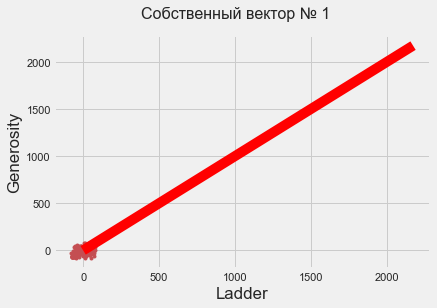

Собственное значение:  1013.65 Собственный вектор:  [-0.70710678  0.70710678]


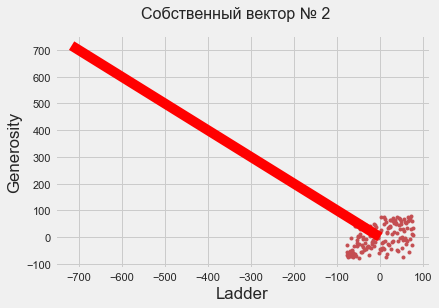

In [86]:
import numpy.linalg as la
import statistics

ladder = data['Ladder']
gener = data['Generosity']
mean1 = statistics.mean(ladder)
ladder -= mean1
mean2 = statistics.mean(gener)
gener -= mean2
Y = np.vstack((ladder, gener)).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(ladder, gener, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([mean1, mean1+w[i]*v[:,i][0]], [mean2, mean2 +w[i] * v[:,i][1]],color='red', linewidth=10)
    plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение? Биномиальное

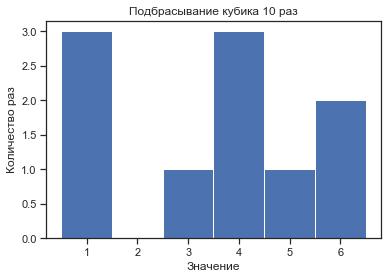

In [23]:
values = np.random.randint(1, 7, size=10)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количествo раз')
plt.title('Подбрасывание кубика 10 раз')
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

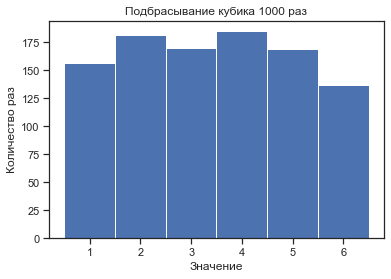

In [24]:
values = np.random.randint(1, 7, size=1000)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количествo раз')
plt.title('Подбрасывание кубика 1000 раз')
plt.show()

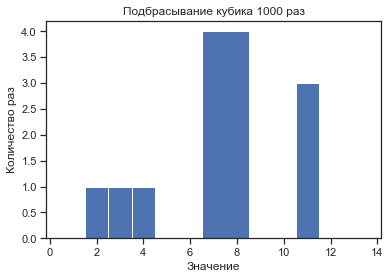

In [30]:
values = np.random.randint(1, 7, size=10) + np.random.randint(1, 7, size=10)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количествo раз')
plt.title('Подбрасывание кубика 1000 раз')
plt.show()

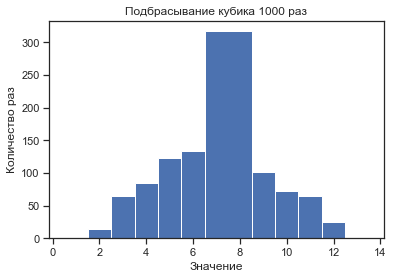

In [31]:
values = np.random.randint(1, 7, size=1000) + np.random.randint(1, 7, size=1000)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количествo раз')
plt.title('Подбрасывание кубика 1000 раз')
plt.show()

Вывод: сумма достаточно большого количества слабо зависимых случайных величин
(в данном случае подбрасывание кубика - случайная величина)
имеет распределение, близкое к нормальному